### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [1]:
import pandas as pd

heart = pd.read_csv('./dataset/heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = heart.corr()
corr
corr['output'].sort_values(ascending=False)[1:]

cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [4]:
# heart_hh = heart.loc[:, 'thalachh'].reset_index()
# heart_hh

# from sklearn.preprocessing import StandardScaler

# std = StandardScaler()
# heart_hh['thalachh'] = std.fit_transform(heart_hh[['thalachh']])
# cond1 = heart_hh['thalachh'] >= -1.96
# cond2 = heart_hh['thalachh'] <= 1.96
# cond = cond1 & cond2

# # mean_value = heart_hh[cond]['thalachh'].mean()
# # heart.loc[~cond, 'thalachh'] = mean_value

# # 결과 확인
# heart_hh

# heart = heart.iloc[heart_hh[cond].index].reset_index(drop=True)
# heart


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

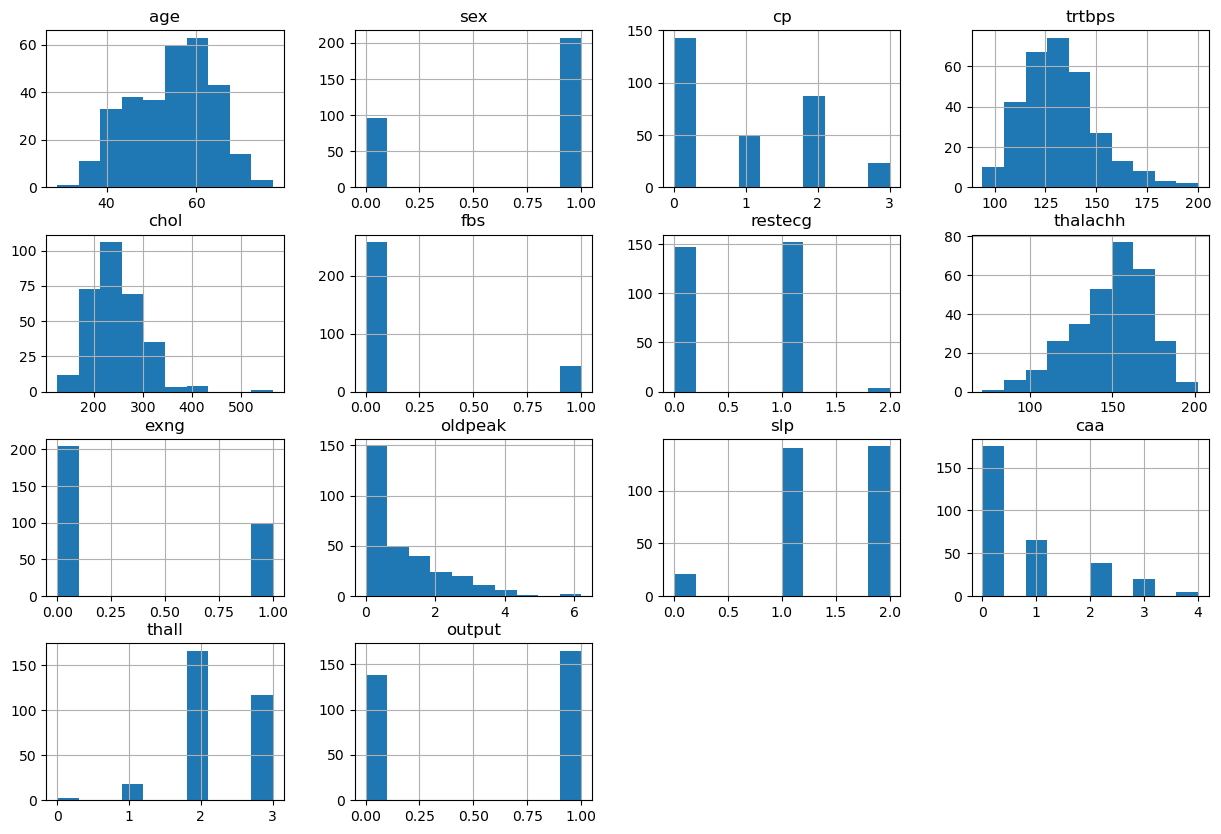

In [5]:
heart.hist(figsize=(15,10))

In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = heart.iloc[:, :-1], heart.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 파이프 라인으로 구축한 각 파이프의 이름을 먼저 작성하고, 
# (_)언더바를 두 번(__) 작성한 뒤 파라미터 이름을 작성한다.
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 1. 파이프라인 구축
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 3. 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [15]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'][36])
display(result_df)

{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.545473,45
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.545473,45
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.545473,45
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.545473,45
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.545473,45
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.570422,42
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.818158,20
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.545473,45
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.818158,20


In [8]:
result_df[result_df['rank_test_score'] == 1]['params']

36    {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...
38    {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...
40    {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...
42    {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...
44    {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel':...
46    {'svc__C': 1, 'svc__gamma': 100, 'svc__kernel'...
Name: params, dtype: object

In [9]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [24]:
svc = SVC(C=1, kernel='linear', probability=True)
# svc = SVC(C=10, gamma=0.01, probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear', probability=True))])

In [25]:
prediction = svc_pipe.predict(X_test.values)

오차 행렬
[[22  6]
 [ 1 32]]
정확도: 0.8852, 정밀도: 0.8993, 재현율: 0.8777, F1: 0.8821
################################################################################


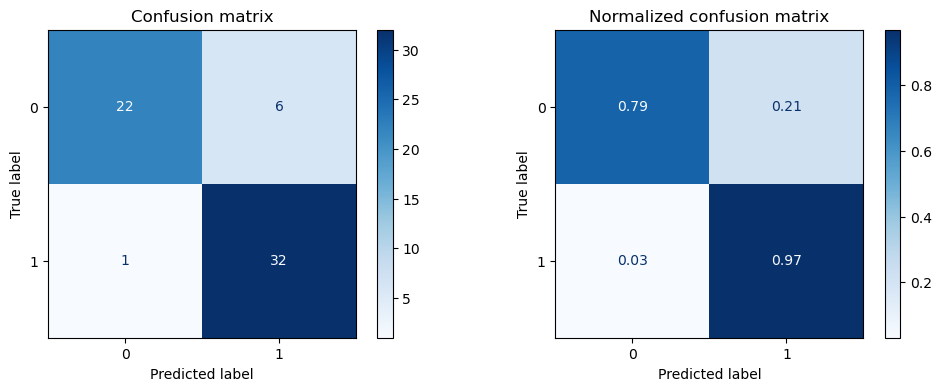

In [26]:
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

In [14]:
svc_pipe.predict_proba(X_test.values).tolist()

[[0.06814304036530862, 0.9318569596346914],
 [0.7565309627997288, 0.2434690372002713],
 [0.44467588895081184, 0.5553241110491881],
 [0.19085466263107745, 0.8091453373689228],
 [0.10039545807794757, 0.8996045419220523],
 [0.11677094341184538, 0.8832290565881545],
 [0.4064458073570338, 0.5935541926429662],
 [0.9682157571897787, 0.03178424281022136],
 [0.06017481541483201, 0.9398251845851681],
 [0.5505633230894553, 0.4494366769105448],
 [0.976409931948786, 0.023590068051214132],
 [0.09072978516350698, 0.9092702148364931],
 [0.8310339082597269, 0.1689660917402732],
 [0.9730623955553965, 0.026937604444603535],
 [0.33223117763238574, 0.6677688223676144],
 [0.9503243068147648, 0.049675693185235285],
 [0.7542711666318106, 0.24572883336818935],
 [0.45606775970544056, 0.5439322402945594],
 [0.13163023540093, 0.8683697645990701],
 [0.07595139211856755, 0.9240486078814326],
 [0.9059487647413773, 0.09405123525862268],
 [0.08754978004746884, 0.9124502199525312],
 [0.07079338292532883, 0.929206617074